### 1、如何用python快速处理数据
- Python处理数据利器——Pandas
- 数据一般格式：csv/xlsx
- 如何用pandas读取数据
- 案例：用pandas处理商铺数据

1) 老方法：列表+字典

In [7]:
# 数据读取
f = open('D:\BaiduNetdiskDownload\资料01_商铺数据.csv','r',encoding='utf-8')
for i in f.readlines()[:5]:
    print(i.split(','))
    # 查看数据

['\ufeffclassify', 'name', 'comment', 'star', 'price', 'address', 'commentlist\n']
['美食', '望蓉城老坛酸菜鱼(合生汇店)', '我要点评', '该商户暂无星级', '人均                                        ￥125', '翔殷路1099号合生汇5F', '口味8.3                                环境8.4                                服务8.5\n']
['美食', '泰国街边料理', '74                    条点评', '准四星商户', '人均                                        ￥48', '黄兴路合生汇B2美食集市内', '口味7.4                                环境7.6                                服务7.4\n']
['美食', '壹面如故(苏宁生活广场店)', '265                    条点评', '准四星商户', '人均                                        ￥21', '邯郸路585号苏宁生活广场B1层', '口味7.0                                环境7.2                                服务7.2\n']
['美食', '鮨谷•Aburiya(合生汇店)', '2748                    条点评', '准五星商户', '人均                                        ￥142', '翔殷路1099号合生广场5楼23、28铺位', '口味8.9                                环境8.5                                服务8.4\n']


In [18]:
# 清洗数据
# 创建comment、price、commentlist清晰函数
# 函数式编程
def fcm(s):
    if '条' in s:
        return int(s.split(' ')[0])
    else:
        return '缺失数据'
# comment清洗函数：用空格分段，选取结果list的第一个为点评数，并且转化为类型

def fpr(s):
    if '￥' in s:
        return float(s.split('￥')[-1])
    else:
        return '缺失数据'
# price清洗函数：用“￥”分段，选取结果list最后一个为人均价格，并且转化为浮点型

def fcl(s):
    if ' ' in s:
        quality = float(s.split('                               ')[0][2:])
        environment = float(s.split('                                ')[1][2:])
        service = float(s.split('                                ')[2][2:])
        return [quality,environment,service]
    else:
        return '缺失数据'
# commentlist清洗函数：用空格分段，分别清洗出质量、环境、服务数据，并转化为浮点型


In [19]:
# 数据清洗
datalst = []

f.seek(0) #将读文件的指针调到文件开头
n = 0 # 创建计数变量
for i in f.readlines()[1:10]:
    data = i.split(',')
    #print(data)
    classify = data[0]
    name = data[1]
    comment_count = fcm(data[2])
    star = data[3]
    price = fpr(data[4])
    addr = data[5]
    qua,env,ser = fcl(data[6])
    if '缺失数据' not in [comment_count, price, qua]:
        n += 1
        data_re = [['classify',classify],
                  ['name',name],
                  ['comment_count',comment_count],
                  ['star',star],
                  ['price',price],
                  ['address',addr],
                  ['quality',qua],
                  ['environment',env],
                  ['service',ser]]
        datalst.append(dict(data_re)) # 生成字典，并存入列表datalst
        print('成功加载%i条数据' % n)
    else:
        continue
print(datalst)
print('总共加载%i条数据' % n)

成功加载1条数据
成功加载2条数据
成功加载3条数据
成功加载4条数据
成功加载5条数据
成功加载6条数据
成功加载7条数据
[{'classify': '美食', 'name': '泰国街边料理', 'comment_count': 74, 'star': '准四星商户', 'price': 48.0, 'address': '黄兴路合生汇B2美食集市内', 'quality': 7.4, 'environment': 7.6, 'service': 7.4}, {'classify': '美食', 'name': '壹面如故(苏宁生活广场店)', 'comment_count': 265, 'star': '准四星商户', 'price': 21.0, 'address': '邯郸路585号苏宁生活广场B1层', 'quality': 7.0, 'environment': 7.2, 'service': 7.2}, {'classify': '美食', 'name': '鮨谷•Aburiya(合生汇店)', 'comment_count': 2748, 'star': '准五星商户', 'price': 142.0, 'address': '翔殷路1099号合生广场5楼23、28铺位', 'quality': 8.9, 'environment': 8.5, 'service': 8.4}, {'classify': '美食', 'name': '麦当劳(万达店)', 'comment_count': 785, 'star': '准四星商户', 'price': 24.0, 'address': '邯郸路600号万达商业广场B1楼A05号铺', 'quality': 7.4, 'environment': 7.2, 'service': 7.2}, {'classify': '美食', 'name': '蒸年青STEAMYOUNG(百联又一城购物中心店)', 'comment_count': 3779, 'star': '准五星商户', 'price': 70.0, 'address': '淞沪路8号百联又一城购物中心7层', 'quality': 8.6, 'environment': 8.6, 'service': 8.6}, {'classify': '

2) 新方法：用Pandas处理

In [26]:
import pandas as pd
# 导入pandas模块
import warnings
warnings.filterwarnings('ignore')
# 不发出警告
print('成功导入模块')

成功导入模块


In [32]:
# 如何用Pandas读取数据 -csv
f = open('D:\BaiduNetdiskDownload\资料01_商铺数据.csv','r',encoding='utf-8')#pandas读入文件如果含有中文，直接读取会报错
df = pd.read_csv(f)
print(type(df),df['name'].dtype) # 查看df类型，查看df种一列的数值类型
df.head()

<class 'pandas.core.frame.DataFrame'> object


,classify,name,comment,star,price,address,commentlist
0,美食,望蓉城老坛酸菜鱼(合生汇店),我要点评,该商户暂无星级,人均 ￥125,翔殷路1099号合生汇5F,口味8.3 环境8.4 ...
1,美食,泰国街边料理,74 条点评,准四星商户,人均 ￥48,黄兴路合生汇B2美食集市内,口味7.4 环境7.6 ...
2,美食,壹面如故(苏宁生活广场店),265 条点评,准四星商户,人均 ￥21,邯郸路585号苏宁生活广场B1层,口味7.0 环境7.2 ...
3,美食,鮨谷•Aburiya(合生汇店),2748 条点评,准五星商户,人均 ￥142,翔殷路1099号合生广场5楼23、28铺位,口味8.9 环境8.5 ...
4,美食,我们的烤肉我们的馕,5 条点评,准四星商户,人均 -,邯郸路399-D3号,口味7.5 环境6.8 ...


In [42]:
df1 = df[df['comment'].str.contains('条')]
df1['comment'] = df1['comment'].str.split('条').str[0]
print(df1['comment'].dtype)

#df1['comment'][:5]
df1['comment'] = df1['comment'].astype('int')
print(df1['comment'].dtype)
df1.head()

object
int32


,classify,name,comment,star,price,address,commentlist
1,美食,泰国街边料理,74,准四星商户,人均 ￥48,黄兴路合生汇B2美食集市内,口味7.4 环境7.6 ...
2,美食,壹面如故(苏宁生活广场店),265,准四星商户,人均 ￥21,邯郸路585号苏宁生活广场B1层,口味7.0 环境7.2 ...
3,美食,鮨谷•Aburiya(合生汇店),2748,准五星商户,人均 ￥142,翔殷路1099号合生广场5楼23、28铺位,口味8.9 环境8.5 ...
4,美食,我们的烤肉我们的馕,5,准四星商户,人均 -,邯郸路399-D3号,口味7.5 环境6.8 ...
5,美食,麦当劳(万达店),785,准四星商户,人均 ￥24,邯郸路600号万达商业广场B1楼A05号铺,口味7.4 环境7.2 ...


In [43]:
df1 = df1[df1['price'].str.contains('￥')]
df1['price'] = df1['price'].str.split('￥').str[-1]
df1['price'] = df1['price'].astype('float')
print(df1['price'].dtype)
df1.head()


float64


,classify,name,comment,star,price,address,commentlist
1,美食,泰国街边料理,74,准四星商户,48.0,黄兴路合生汇B2美食集市内,口味7.4 环境7.6 ...
2,美食,壹面如故(苏宁生活广场店),265,准四星商户,21.0,邯郸路585号苏宁生活广场B1层,口味7.0 环境7.2 ...
3,美食,鮨谷•Aburiya(合生汇店),2748,准五星商户,142.0,翔殷路1099号合生广场5楼23、28铺位,口味8.9 环境8.5 ...
5,美食,麦当劳(万达店),785,准四星商户,24.0,邯郸路600号万达商业广场B1楼A05号铺,口味7.4 环境7.2 ...
6,美食,蒸年青STEAMYOUNG(百联又一城购物中心店),3779,准五星商户,70.0,淞沪路8号百联又一城购物中心7层,口味8.6 环境8.6 ...


In [47]:
df1['quality'] = df1['commentlist'].str.split('                               ').str[0].str[2:].astype('float')
df1['environment'] = df1['commentlist'].str.split('                                ').str[1].str[2:].astype('float')
df1['service'] = df1['commentlist'].str.split('                                ').str[2].str[2:].astype('float')
del df1['commentlist']
df1.head()

,classify,name,comment,star,price,address,quality,environment,service
1,美食,泰国街边料理,74,准四星商户,48.0,黄兴路合生汇B2美食集市内,7.4,7.6,7.4
2,美食,壹面如故(苏宁生活广场店),265,准四星商户,21.0,邯郸路585号苏宁生活广场B1层,7.0,7.2,7.2
3,美食,鮨谷•Aburiya(合生汇店),2748,准五星商户,142.0,翔殷路1099号合生广场5楼23、28铺位,8.9,8.5,8.4
5,美食,麦当劳(万达店),785,准四星商户,24.0,邯郸路600号万达商业广场B1楼A05号铺,7.4,7.2,7.2
6,美食,蒸年青STEAMYOUNG(百联又一城购物中心店),3779,准五星商户,70.0,淞沪路8号百联又一城购物中心7层,8.6,8.6,8.6


### 2、初学者在数据索引的常见问题
- 列索引/行索引问题：df[..]/iloc/.loc
- 布尔型索引

In [49]:
# 列索引['quality']
df1['quality'].head()

1    7.4
2    7.0
3    8.9
5    7.4
6    8.6
Name: quality, dtype: float64

In [50]:
# 多列索引
df1[['quality','environment']].head()

,quality,environment
1,7.4,7.6
2,7.0,7.2
3,8.9,8.5
5,7.4,7.2
6,8.6,8.6


In [53]:
# df.loc['index'] 按照index 去索引

import numpy as np

df = pd.DataFrame(np.random.rand(12).reshape(3,4)*100,
                 index = ['one','two','three'],
                columns = ['A','B','C','D'])

data1 = df.loc['one']
data2 = df.loc[['one','two']]
print(data1,'\n------',type(data1))
print(data2,'\n------',type(data2))


A    13.406688
B    70.781094
C    67.880059
D    78.845145
Name: one, dtype: float64 
------ <class 'pandas.core.series.Series'>
             A          B          C          D
one  13.406688  70.781094  67.880059  78.845145
two  57.204533  53.961845  21.966304   4.666978 
------ <class 'pandas.core.frame.DataFrame'>


In [56]:
# 行索引 ，iloc按照行数去选
# 按照整数位置（从轴0到length-1）选择行
data3 = df.iloc[0]
data4 = df.iloc[[2,0]]
data5 = df.iloc[0:3]

print(data3,'\n------',type(data3))
print(data4,'\n------',type(data4))
print(data5,'\n------',type(data5))


A    13.406688
B    70.781094
C    67.880059
D    78.845145
Name: one, dtype: float64 
------ <class 'pandas.core.series.Series'>
               A          B          C          D
three  32.748687  83.539506   9.298103  68.632795
one    13.406688  70.781094  67.880059  78.845145 
------ <class 'pandas.core.frame.DataFrame'>
               A          B          C          D
one    13.406688  70.781094  67.880059  78.845145
two    57.204533  53.961845  21.966304   4.666978
three  32.748687  83.539506   9.298103  68.632795 
------ <class 'pandas.core.frame.DataFrame'>


In [58]:
# 布尔型的索引
df1[df1['comment']>50].head()


,classify,name,comment,star,price,address,quality,environment,service
1,美食,泰国街边料理,74,准四星商户,48.0,黄兴路合生汇B2美食集市内,7.4,7.6,7.4
2,美食,壹面如故(苏宁生活广场店),265,准四星商户,21.0,邯郸路585号苏宁生活广场B1层,7.0,7.2,7.2
3,美食,鮨谷•Aburiya(合生汇店),2748,准五星商户,142.0,翔殷路1099号合生广场5楼23、28铺位,8.9,8.5,8.4
5,美食,麦当劳(万达店),785,准四星商户,24.0,邯郸路600号万达商业广场B1楼A05号铺,7.4,7.2,7.2
6,美食,蒸年青STEAMYOUNG(百联又一城购物中心店),3779,准五星商户,70.0,淞沪路8号百联又一城购物中心7层,8.6,8.6,8.6


In [59]:
df1[df1['price']>100]['comment'].sum()
df1[df1['comment']>50][['quality','environment','service']].head()

,quality,environment,service
1,7.4,7.6,7.4
2,7.0,7.2,7.2
3,8.9,8.5,8.4
5,7.4,7.2,7.2
6,8.6,8.6,8.6


### 3、Pandas的套路
- 数据类型问题，serices和dataframe
- 去重
- 替换
- 分组
- 合并

In [ ]:
# Series，带有标签的一维数组，可以保存任何数据类型（整数、浮点、字符串、Python对象等），轴标签统称为索引
s = pd.Series(np.random.rand(5))
print(s)
print(type(s))

In [63]:
# DataFrame 数据结构
# DataFrame是一个表格型的数据结构，“带有标签的二维数据”
# DataFrame带有index（行标签）和columns（列标签）

data = {'name':['Jack','Tom','Sunny'],
        'age':['23','19','18'],
        'gender':['m','w','m']
    
}
frame = pd.DataFrame(data)
print(frame)
print(frame.values)

  age gender   name
0  23      m   Jack
1  19      w    Tom
2  18      m  Sunny
[['23' 'm' 'Jack']
 ['19' 'w' 'Tom']
 ['18' 'm' 'Sunny']]


In [65]:
# 常用创建方法
# 1、直接读取数据，pd.read...
# 2、结合numpy创建随机数，常用方法—— 字典创建dataframe / 随机数+columns参数设置

df = pd.DataFrame({'value1':np.random.rand(10)*10,
                  'value2':np.random.rand(10)*100})
df

,value1,value2
0,7.341088,10.586261
1,8.260010,36.571033
2,2.636710,70.976256
3,0.895041,78.837271
4,7.605441,30.755006
5,6.460057,84.880144
6,7.347838,75.239573
7,5.509200,89.171868
8,1.713098,0.909261
9,1.199394,46.827425


In [68]:
df = pd.DataFrame(np.random.rand(10,2)*100,columns=['value1','value2'])
df

,value1,value2
0,41.744144,57.675621
1,20.356153,16.566219
2,65.814937,42.967649
3,53.866555,89.428502
4,1.330446,25.392768
5,25.991836,18.969008
6,99.673146,44.180044
7,41.607307,59.788699
8,83.040954,91.949932
9,55.039390,55.691654


In [71]:
# 去重 .duplicated
s = pd.Series([1,1,1,1,2,2,2,2,3,4,5,5,6,6,6,7])
#print(s.duplicated())
print(s[s.duplicated() == False])
print('-------------')
# 判断是否重复
# 通过布尔值判断，得到不重复的值

s_re = s.drop_duplicates()
print(s_re)
print('----------------------')
# drop_duplicates移除重复
# inplace参数，是否替换原值，默认为False

df = pd.DataFrame({'key1':['a','a',3,4,5],
                  'key2':['a','a','b','b','c']})
print(df.duplicated())
print(df['key2'].duplicated())
# dataframe中使用duplicated

0     1
4     2
8     3
9     4
10    5
12    6
15    7
dtype: int64
-------------
0     1
4     2
8     3
9     4
10    5
12    6
15    7
dtype: int64
----------------------
0    False
1     True
2    False
3    False
4    False
dtype: bool
0    False
1     True
2    False
3     True
4    False
Name: key2, dtype: bool


In [72]:
# 替换， replace
s = pd.Series(list('ascaazsd'))
print(s.replace('a',np.nan))
print(s.replace(['a','c'],np.nan))
print(s.replace({'a':'hello world!','s':123}))
# 可一次性替换一个或多个值，可传入列表或字典

0    NaN
1      s
2      c
3    NaN
4    NaN
5      z
6      s
7      d
dtype: object
0    NaN
1      s
2    NaN
3    NaN
4    NaN
5      z
6      s
7      d
dtype: object
0    hello world!
1             123
2               c
3    hello world!
4    hello world!
5               z
6             123
7               d
dtype: object


In [74]:
# 分组
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
print(df)
print('---------------------')
print(df.groupby('A'),type(df.groupby('A')))
print('----------------------')
# 直接分组得到一个groupby对象，是一个中间数据，没有进行计算

a = df.groupby('A').mean()
print(a,type(a),'\n',a.columns)

     A      B         C         D
0  foo    one -1.791812 -0.494852
1  bar    one  0.465086  1.302065
2  foo    two  0.772881  0.038126
3  bar  three  0.266120  1.411584
4  foo    two  0.775716 -1.790776
5  bar    two  0.760500  0.835696
6  foo    one -0.781556  0.568104
7  foo  three -0.100109 -1.862230
---------------------
<pandas.core.groupby.DataFrameGroupBy object at 0x0000019EA7692CC0> <class 'pandas.core.groupby.DataFrameGroupBy'>
----------------------
            C         D
A                      
bar  0.497235  1.183115
foo -0.224976 -0.708325 <class 'pandas.core.frame.DataFrame'> 
 Index(['C', 'D'], dtype='object')


In [76]:
# merge合并 → 类似excel的vlookup

df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
df2 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
df3 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                    'key2': ['K0', 'K1', 'K0', 'K1'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})
df4 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                    'key2': ['K0', 'K0', 'K0', 'K0'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})
print(pd.merge(df1,df2,on='key'))
print('--------------------')
# left:第一个df，right：第二个df
# on：参考键
# 参数 left_on, right_on, left_index, right_index → 当键不为一个列时，可以单独设置左键与右键
print(pd.merge(df3,df4,on=['key1','key2']))
#多个链接键

print(pd.merge(df3,df4,on=['key1','key2'], how='inner'))
print('-------------')
# 参数how → 合并方式
    # inner：默认，取交集
    # outer：取并集，数据缺失范围NaN
    # left：按照df3为参考合并，数据缺失范围NaN
    # right：按照df4为参考合并，数据缺失范围NaN

    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K2  C2  D2
3  A3  B3  K3  C3  D3
--------------------
    A   B key1 key2   C   D
0  A0  B0   K0   K0  C0  D0
1  A2  B2   K1   K0  C1  D1
2  A2  B2   K1   K0  C2  D2
    A   B key1 key2   C   D
0  A0  B0   K0   K0  C0  D0
1  A2  B2   K1   K0  C1  D1
2  A2  B2   K1   K0  C2  D2
-------------


### 2、制图

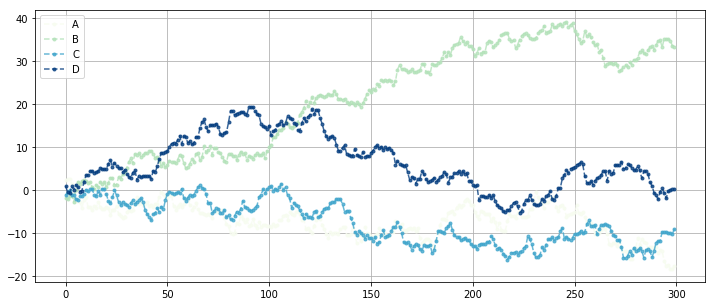

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(np.random.randn(300,4),columns=list('ABCD'))
df = df.cumsum()
df.plot(style='--.', alpha = 0.8, colormap='GnBu', figsize=(12,5), grid=True)
#直方图

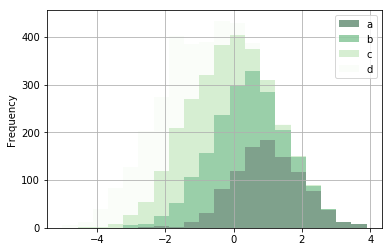

In [81]:
# 堆叠直方图
plt.figure(num=1, figsize=(12,5))
df = pd.DataFrame({'a':np.random.randn(1000)+1,
                  'b':np.random.randn(1000),
                  'c':np.random.randn(1000)-1,
                  'd':np.random.randn(1000)-2}, columns=['a','b','c','d'])
df.plot.hist(stacked=True, #是否堆叠
            bins = 20,
            colormap='Greens_r',
            alpha =0.5,
            grid = True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EA7EA87F0>,
      dtype=object)

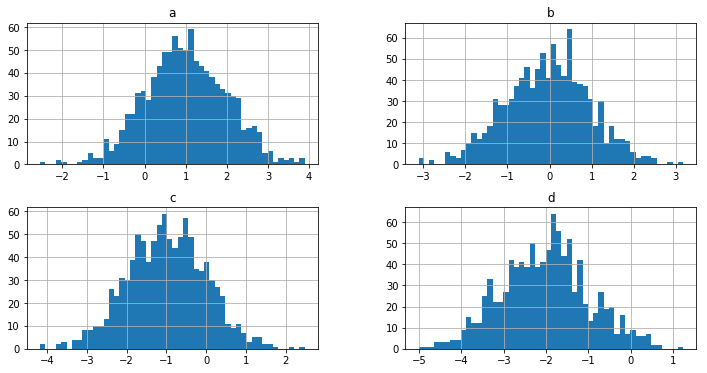

In [82]:
# 生成多个直方图
df.hist(bins=50,figsize=(12,6))


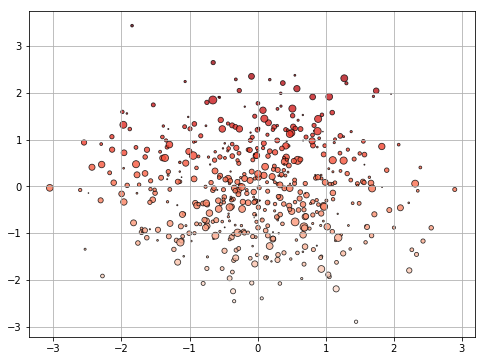

In [85]:
# plt.scatter() 散点图
plt.figure(figsize=(8,6))
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x,y,
           marker='.',
           linewidth=0.8,
           edgecolor='k',
           s = np.random.randn(1000)*100,
           cmap = 'Reds',
           c = y,
           alpha = 0.8)
plt.grid()
# s: 散点的大小
# c：散点的颜色
# vmin, Vmax: 亮度设置，标量
# camp: colormap